In [24]:
import pandas as pd
import pypoptim
from matplotlib import pyplot as plt
import seaborn as sns
import pickle
import os
import sys
import numpy as np
from pypoptim.postprocessing import collect_results
plt.style.use('../styles/general.mplstyle')

In [25]:
sys.path.append("../../pypoptim/src/pypoptim/")

In [26]:
dirname, case = "../results/ina/", "210720_153816"
output_dict = collect_results(case, dirname, load_dump=True)

AttributeError: Can't get attribute 'new_block' on <module 'pandas.core.internals.blocks' from '/home/nik/.local/lib/python3.8/site-packages/pandas/core/internals/blocks.py'>

In [13]:
config_path = os.path.join(dirname, case)
with open(os.path.join(config_path, "config_backup.pickle"), 'rb') as f:
    config = pickle.load(f)


AttributeError: Can't get attribute 'new_block' on <module 'pandas.core.internals.blocks' from '/home/nik/.local/lib/python3.8/site-packages/pandas/core/internals/blocks.py'>

In [14]:
config

{'n_organisms': 16,
 'n_elites': 2,
 'n_generations': 100,
 'output_folder_name': '../../results/ina/',
 'loss': 'RMSE',
 'columns_control': ['I_out'],
 'columns_model': ['I_out'],
 'column_stim_protocol': ['v'],
 'filename_so': '../../src/model_ctypes/ina/ina.so',
 'filename_legend_states': '../../src/model_ctypes/ina/legend_states.csv',
 'filename_legend_constants': '../../src/model_ctypes/ina/legend_constants.csv',
 'filename_legend_algebraic': '../../src/model_ctypes/ina/legend_algebraic.csv',
 'filename_protocol': '../../data/protocols/protocol_trace.csv',
 'filename_initial_state_protocol': '../../data/protocols/protocol_initial_state.csv',
 'experimental_conditions': {'common': {'params': {'c_p': {'bounds': [0.1, 10],
     'gamma': 1,
     'is_multiplier': True}}},
  'trace': {'params': {'c_m': {'bounds': [0.1, 10],
     'gamma': 1,
     'is_multiplier': True}},
   'filename_phenotype': '/home/nik/Documents/comparison/INa_full_trace/data/training/artificial_data.csv',
   'phenot

In [15]:
output_dict.keys()

dict_keys(['trio', 'genes', 'dump_last', 'dump_elite', 'dump', 'phenotype_model_last', 'config', 'genes_best', 'state'])

In [16]:
config = output_dict['config']

genes_best = output_dict['genes_best']
phenotype = output_dict['phenotype_model_last']['trace']
dump_elite = output_dict['dump_elite']
dump_last = output_dict['dump_last']

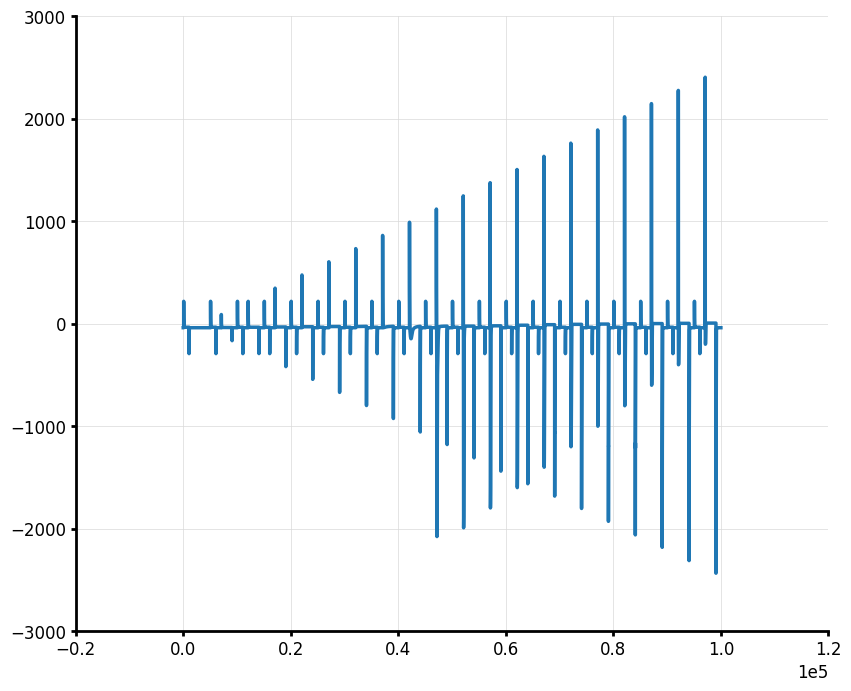

In [17]:
plt.plot(phenotype['I_out']) 

In [23]:
dump_elite = np.fromfile('../results/ina/210720_153816/sol_best.csv')
dump_elite = dump_elite.reshape(-1, 28+1)
loss = dump_elite[:, -1]


ValueError: cannot reshape array of size 113 into shape (29)

In [19]:
plt.plot(loss)
plt.xlabel("epoch")
plt.ylabel("loss")
plt.tight_layout()
plt.savefig('../data/pictures/results_ga/210706_143528_full.png', dpi = 300)

NameError: name 'loss' is not defined

In [20]:
plt.plot(loss[:])

NameError: name 'loss' is not defined

In [21]:
dump_elite

In [22]:
loss = -dump_elite[:, -1]
dump_elite = pd.DataFrame(dump_elite[:, :-1], columns=config['runtime']['m_index'])
dump_elite = dump_elite.T.reset_index(level=0, drop=True).T.astype(float)

TypeError: 'NoneType' object is not subscriptable

In [32]:
dump_last = dump_last.T.reset_index(level=0, drop=True).T.astype(float)
dump_elite

NameError: name 'dump_last' is not defined

In [33]:
x='c_m'
y='v_off'

sns.scatterplot(data=dump_last, x=x, y=y, hue='fitness')
plt.plot(dump_elite[x], dump_elite[y], '-r')

plt.xscale('log')
# plt.yscale('log')

NameError: name 'dump_last' is not defined

In [34]:
plt.plot(dump_elite['v_off'], '.-')

NameError: name 'dump_elite' is not defined

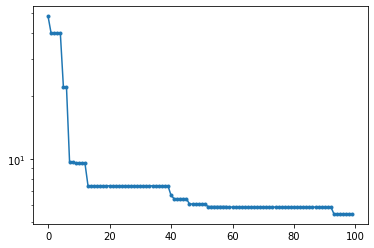

In [35]:
plt.semilogy(loss, '.-')

In [37]:
plt.style.use('../styles/general.mplstyle')

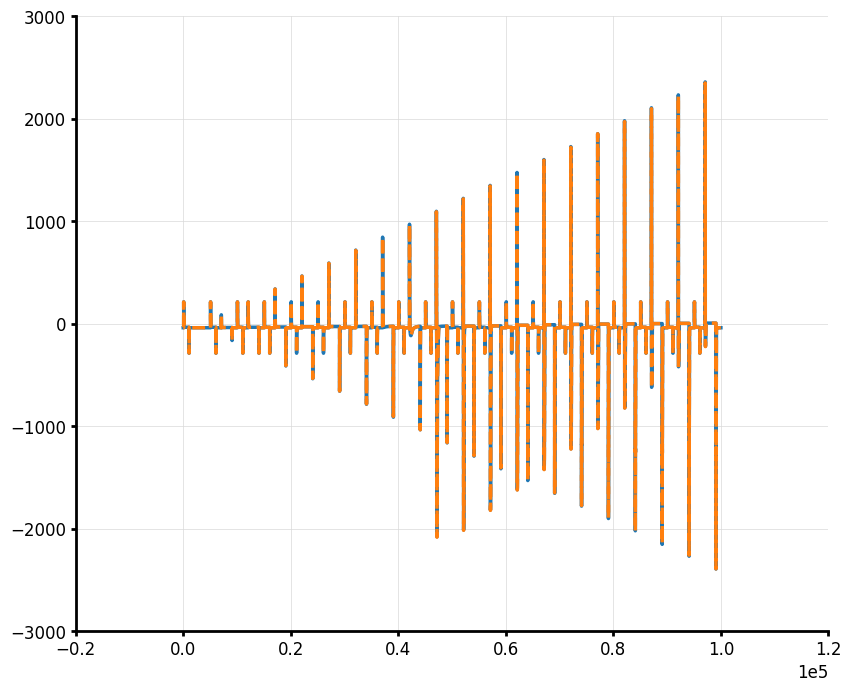

In [38]:
plt.plot(pd.read_csv('../data/training/artificial_data.csv').V)
plt.plot(phenotype, '--')


In [42]:
import numpy as np


In [24]:
loss = np.load('../loss.npy')

len(loss)

1000

In [43]:
np.save('phenotype',phenotype)

In [39]:
n_sections = 20
split_indices = np.linspace(0, len(df_protocol.v), n_sections + 1).astype(int)
nrows, ncols = 4, 5
fig, axes = plt.subplots(nrows=nrows, ncols=ncols,
                             figsize=plt.figaspect(nrows / ncols) * 2,
                             sharex=True)

I_out =calculate_full_trace(res_dual_annealing_2.x, kwargs)
real_data_all = phenotype
dt = 5e-5

colors = ['0.3', 'C1']

i_global = 0

for i_row in range(nrows):
    for i_col in range(ncols):
        ax = axes[i_row, i_col]
        plt.sca(ax)

        i_start, i_end = split_indices[i_global], split_indices[i_global + 1]
        slice_current = slice(i_start, i_end)

        I_out_current = I_out[slice_current]
        data_current  = real_data_all[slice_current]
        t = np.arange(len(data_current)) * dt
            
            #for k in output_A.columns[6:9]:
            #    plt.plot(t,output_A[k][slice_current], '.-', label = k)
           # for k in output_A.columns[10:10]:
            #    plt.plot(t,output_A[k][slice_current], '.-', label = k)    

        plt.plot(t, data_current, color=colors[0])
        plt.plot(t, I_out_current, lw=0.68, color=colors[1])
        plt.xlim(0,0.25)
        plt.grid()

        step_value = -80 + 5 * i_global
        title = f'step {step_value} mV'
        plt.title(title)
    
        i_global += 1
plt.legend()
plt.tight_layout()
folder_save = "../data/pictures/results"
filename_prefix = 'ga'
#plt.title(filename_prefix)
#plt.show()
    
filename_save = os.path.join(folder_save, f'{filename_prefix}_grid.png')

#plt.savefig(filename_save, dpi=300)

NameError: name 'np' is not defined

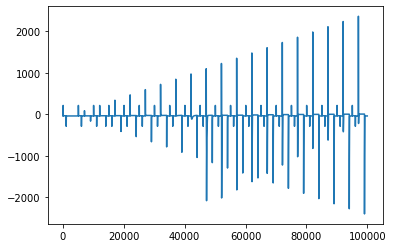

In [6]:
plt.plot(pd.read_csv('../data/training/artificial_data.csv').V)

In [9]:
import numpy as np

In [11]:
A = np.load('../ga/pypoptim/results/210706_143528/dump_last.npy')

In [14]:
len(A[0])

29

In [ ]:
x='c_m'
y='v_off'

sns.scatterplot(data=dump_last, x=x, y=y, hue='fitness')
plt.plot(dump_elite[x], dump_elite[y], '-r')

plt.xscale('log')
# plt.yscale('log')